# Assignment 1: Bayesian Decision Theory and Parametric Estimation
- Eduards Alexis Mendez Chipatecua
- Juliana Alejandra Nieto Cárdenas

## Part 1
### a) Obtaining the Abalone Dataset & Data Preprocessing


In [ ]:
import pandas as pd
import numpy as np
from math import floor
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.stats import multivariate_normal


Importing dataset and dropping *Sex* attribute

In [ ]:
df_features = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", 
                 names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])

In [ ]:
df_features.drop(columns=["Sex"], inplace=True)
df_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Getting `rings_hat` which is the average of the rings attribute of the whole data set

In [ ]:
rings_hat= df_features["Rings"].mean()

Converting **Rings** column to *categorical*

In [ ]:
df_features["Rings"] = np.where(df_features["Rings"] >= rings_hat, 1, 0)

### b) Setting `X`(features) and `y`(labels)

In [ ]:
X = df_features.drop(columns=["Rings"]).to_numpy().astype('float')
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [ ]:
y = df_features["Rings"].to_numpy().astype('float')
y

array([1., 0., 0., ..., 0., 1., 1.])

#### Gaussian Naive Bayes Classifier

In [ ]:
class GaussianNaiveBayes:
    def __init__(self,attr):
        self.attributes = attr
        self.mean = None
        self.variance = None
        self.prior = None
     
    def fit(self, X, y, all_cov=None):
        # It calculates the mean, variance, and prior of each class in the training 
        # data and stores them in the corresponding attributes of the classifier

        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.mean = np.zeros((n_classes, n_features))
        self.variance = np.zeros(n_classes)
        self.prior = np.zeros(n_classes)

        for c in self.classes:
            c = int(c)
            X_c = X[c == y]
            self.mean[c, :] = X_c.mean(axis=0)
            self.variance[c] = X_c.var()
            self.prior[c] = X_c.shape[0] / float(n_samples)

        if all_cov is not None:
            self.variance.fill(all_cov)
    def predict(self, X):
      # makes predictions on the input data X using the classifier's mean, 
      # variance, and prior attributes. It calls the _predict method for
      # each data point in X and returns an array of predicted labels

        
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
      # computes the posterior probability of each class for the input data point x 
      # and returns the class with the highest posterior probability as the predicted label. 
      # It uses the _pdf method to calculate the class conditional probability of x.
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.prior[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var)) # [2x 0, 0 2x]
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def __str__(self):
      return f"Atribute(s): {self.attributes} \n Mean: {self.mean} \n Variance: {self.variance}"

### c) Splitting in training and validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### d) Univariate Gaussian Classifiers

In [ ]:
import matplotlib.pyplot as plt

column_names = list(df_features.columns.values)
for attr in range(X.shape[1]):
    attr_name= column_names[attr]
    X_feature = X[:,attr].astype('float')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_feature, y, test_size=0.33, random_state=42)
    # Train the classifier
    clf = GaussianNaiveBayes(attr_name)
    clf.fit(X_train.reshape(-1, 1), y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test.reshape(-1, 1))

    # Print Model Parameters
    print(clf)
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate the precision of the classifier
    accuracy =  precision_score(y_test, y_pred)
    print(f"Precision: {accuracy}")

    # Calculate the recall of the classifier
    accuracy =  recall_score(y_test, y_pred)
    print(f"Recall: {accuracy} \n\n")

    


Atribute(s): Length 
 Mean: [[0.463943  ]
 [0.58700071]] 
 Variance: [0.0139691  0.00716482]
Accuracy: 0.7084844089920233
Precision: 0.6622114216281896
Recall: 0.8146487294469357 


Atribute(s): Diameter 
 Mean: [[0.35686508]
 [0.46118272]] 
 Variance: [0.00936912 0.00483107]
Accuracy: 0.7266134880348079
Precision: 0.6802469135802469
Recall: 0.8236173393124065 


Atribute(s): Height 
 Mean: [[0.11909452]
 [0.16072946]] 
 Variance: [0.00194956 0.00084253]
Accuracy: 0.7440174039158811
Precision: 0.6955445544554455
Recall: 0.8400597907324364 


Atribute(s): Whole weight 
 Mean: [[0.57440332]
 [1.09317387]] 
 Variance: [0.14642644 0.20475156]
Accuracy: 0.7273386511965192
Precision: 0.7397708674304418
Recall: 0.6756352765321375 


Atribute(s): Shucked weight 
 Mean: [[0.26276118]
 [0.46136013]] 
 Variance: [0.03409004 0.04656152]
Accuracy: 0.6744017403915881
Precision: 0.6916376306620209
Recall: 0.593423019431988 


Atribute(s): Viscera weight 
 Mean: [[0.12555519]
 [0.2378187 ]] 
 Variance

*The Best Univariate Model* is the one with **Shell Weight** as its only feature. This is based on the fact that the model built upon the data of **Shell Weight** has the highest accuracy

In [118]:
i_bu = 6
X_bu = X[:,i_bu].astype('float')
X_train_bu, X_test_bu, y_train_bu, y_test_bu = model_selection.train_test_split(X_bu, y, test_size=0.33, random_state=42)
# Train the classifier
best_univariate_clf = GaussianNaiveBayes("Mejor")
best_univariate_clf.fit(X_train_bu.reshape(-1, 1), y_train_bu)

# Make predictions on the testing set
y_pred_bu = best_univariate_clf.predict(X_test_bu.reshape(-1, 1))

## Part 2
### a) Bivariate Gaussian Distributions


Pair: Length && Diameter


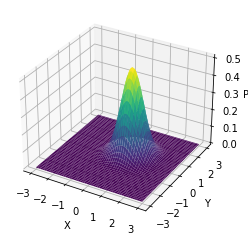

Pair: Length && Height


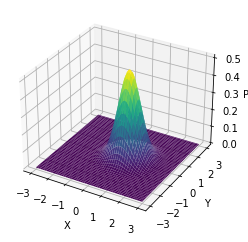

Pair: Length && Whole weight


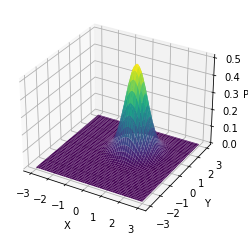

Pair: Length && Shucked weight


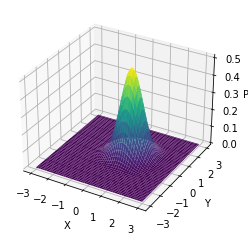

Pair: Length && Viscera weight


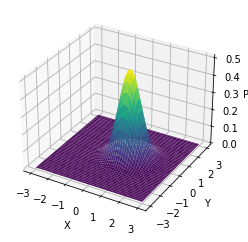

Pair: Length && Shell weight


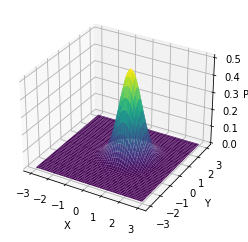

Pair: Diameter && Height


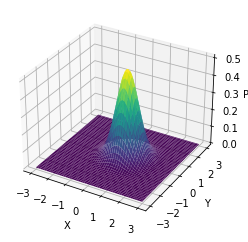

Pair: Diameter && Whole weight


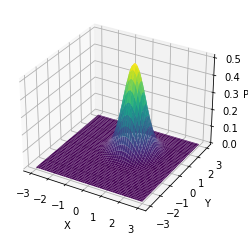

Pair: Diameter && Shucked weight


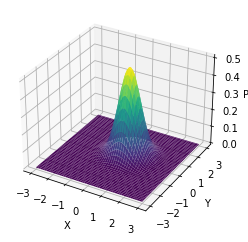

Pair: Diameter && Viscera weight


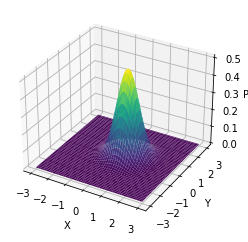

Pair: Diameter && Shell weight


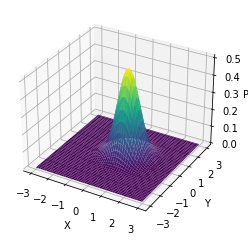

Pair: Height && Whole weight


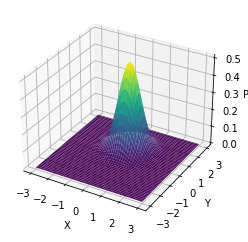

Pair: Height && Shucked weight


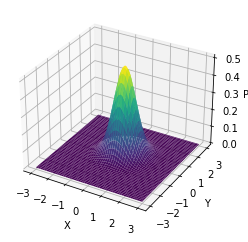

Pair: Height && Viscera weight


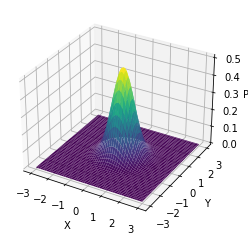

Pair: Height && Shell weight


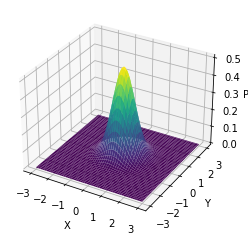

Pair: Whole weight && Shucked weight


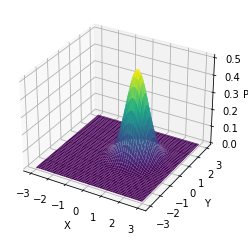

Pair: Whole weight && Viscera weight


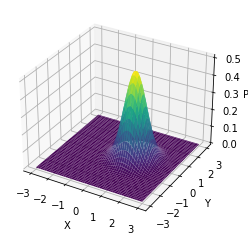

Pair: Whole weight && Shell weight


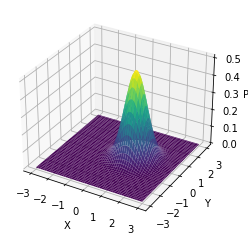

Pair: Shucked weight && Viscera weight


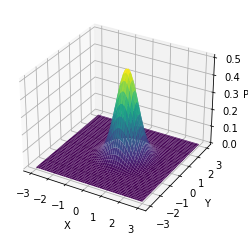

Pair: Shucked weight && Shell weight


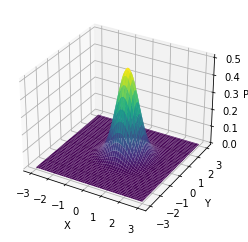

Pair: Viscera weight && Shell weight


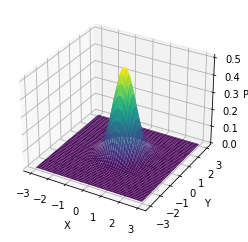

In [119]:
column_names = list(df_features.columns.values)

for i in range(X.shape[1]):
  for j in range(i+1,X.shape[1]):
    pair_name = f"{column_names[i]} && {column_names[j]}"
    mu_i = np.mean(X[:, i])
    mu_j = np.mean(X[:, j])
    sigma = np.std(X)
    cov = np.eye(2) * sigma
    mean = np.array([mu_i, mu_j])
    distribution = multivariate_normal(mean=mean, cov=cov)
    print(f"Pair: {pair_name}")
    # Define the x and y ranges for the plot
    x_plot = np.linspace(-3, 3, 100)
    y_plot = np.linspace(-3, 3, 100)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    pos = np.dstack((X_plot, Y_plot))

    # Evaluate the PDF of the distribution at each point on the grid
    Z = distribution.pdf(pos)

    # Plotting

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_plot, Y_plot, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('PDF')
    plt.show()

### b) Bivariate Gaussian NaIve Bayes Classifiers


In [120]:
for i in range(X.shape[1]):
  for j in range(i+1,X.shape[1]):
    pair_name = f"{column_names[i]} && {column_names[j]}"
    sigma = np.std(X)
    X_feature = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1)), axis=1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_feature, y, test_size=0.33, random_state=42)
    gnb = GaussianNB(var_smoothing=sigma)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    # Parameters
    print(f"Pair: {pair_name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate the precision of the classifier
    accuracy =  precision_score(y_test, y_pred)
    print(f"Precision: {accuracy}")

    # Calculate the recall of the classifier
    accuracy =  recall_score(y_test, y_pred)
    print(f"Recall: {accuracy} \n\n")

Pair: Length && Diameter
Accuracy: 0.7113850616388687
Precision: 0.6618876941457587
Recall: 0.828101644245142 


Pair: Length && Height
Accuracy: 0.7142857142857143
Precision: 0.6608187134502924
Recall: 0.8445440956651719 


Pair: Length && Whole weight
Accuracy: 0.7273386511965192
Precision: 0.7299843014128728
Recall: 0.695067264573991 


Pair: Length && Shucked weight
Accuracy: 0.700507614213198
Precision: 0.6871345029239766
Recall: 0.70254110612855 


Pair: Length && Viscera weight
Accuracy: 0.7157360406091371
Precision: 0.6920943134535368
Recall: 0.7458893871449925 


Pair: Length && Shell weight
Accuracy: 0.7367657722987673
Precision: 0.71671388101983
Recall: 0.7563527653213752 


Pair: Diameter && Height
Accuracy: 0.7374909354604786
Precision: 0.6842737094837935
Recall: 0.852017937219731 


Pair: Diameter && Whole weight
Accuracy: 0.7295141406816533
Precision: 0.7334384858044164
Recall: 0.695067264573991 


Pair: Diameter && Shucked weight
Accuracy: 0.7041334300217549
Precision: 

### c) ROC Curves for best univariate and bivariate models


ROC Curve for best univariate 

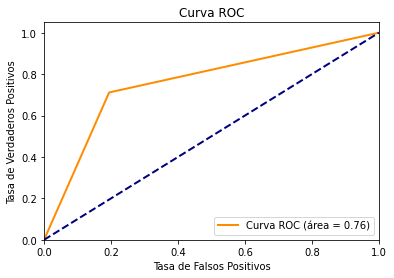

In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true son las etiquetas verdaderas y y_scores son las puntuaciones del modelo
fpr_bu, tpr_bu, thresholds_bu = roc_curve(y_test_bu, y_pred_bu)
roc_auc_bu = auc(fpr_bu, tpr_bu)

# Dibujar la curva ROC
plt.plot(fpr_bu, tpr_bu, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_bu)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

ROC Curve for *best bivariate combination* which is **Diameter and Shell Weight**. This is because **Diameter and Shell Weight** has the highest accuracy, precision, and recall scores among all pairs. 

In [124]:
i_bb = 1
j_bb = 6

In [125]:
X_best_bi =np.concatenate((X[:,i_bb].reshape(-1,1),X[:,j_bb].reshape(-1,1)), axis=1).astype('float')
X_train_bb, X_test_bb, y_train_bb, y_test_bb = model_selection.train_test_split(X_best_bi, y, test_size=0.33, random_state=42)

In [126]:
sigma = np.std(X)
gnb_bb = GaussianNB()

In [127]:
gnb_bb.fit(X_train_bb, y_train_bb)
y_pred_bb = gnb.predict(X_test_bb)

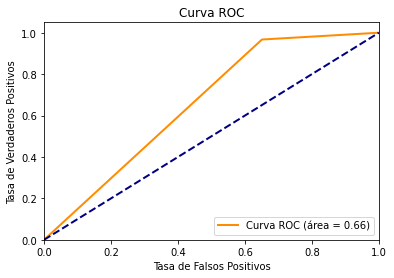

In [128]:
fpr_bb, tpr_bb, thresholds_bb = roc_curve(y_test_bb, y_pred_bb)
roc_auc_bb = auc(fpr_bb, tpr_bb)

plt.plot(fpr_bb, tpr_bb, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_bb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Part 3
### a) Regions of each class

In [129]:
y_pred_bb_x = gnb.predict_proba(X_test_bb)

In [131]:
x_min, x_max = X_train_bb[:, 0].min() - 1, X_train_bb[:, 0].max() + 1
y_min, y_max = X_train_bb[:, 1].min() - 1, X_train_bb[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X_train_bb[:,0].max(), 500),
                     np.linspace(X[:,1].min(), X_train_bb[:,1].max(), 500))
Xgrid = np.column_stack((xx.ravel(), yy.ravel()))

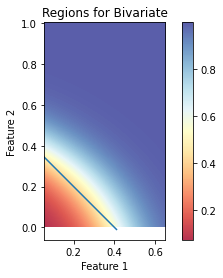

In [141]:
log_prob = gnb.predict_log_proba(Xgrid)
# Compute the difference in log probabilities between the two classes for each point
log_prob_diff = log_prob[:, 1] - log_prob[:, 0]

# Convert the log probability difference to a probability using the logistic function
prob_diff = 1 / (1 + np.exp(-log_prob_diff))

# Reshape the probability difference to the shape of the meshgrid
Z = prob_diff.reshape(xx.shape)

# Plot the decision boundary as a heatmap over the meshgrid of points
plt.imshow(Z, origin='lower', extent=[X_train_bb[:,0].min(), X_train_bb[:,0].max(), X_train_bb[:,1].min(), X_train_bb[:,1].max()], cmap='RdYlBu', alpha=0.8)
plt.colorbar()

# Define the slope and y-intercept
m = -1
b = 0.4

# Generate some x values
x_a = np.linspace(X_train_bb[:, 0].min(),0.41,100)

# Calculate the y values
y_a = [m * i + b for i in x_a]

# Plot the line
plt.plot(x_a, y_a)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regions for Bivariate')
plt.show()

## Part 4

Para construir un clasificador bivariante con una matriz de covarianza arbitraria y diferente para cada clase, modificaremos la clase GaussianNaiveBayes y actualizaremos el método fit para calcular las matrices de covarianza de cada clase. También actualizaremos el método _pdf para manejar las nuevas matrices de covarianza.


In [133]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [134]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self, attr):
        # Inicializa los atributos del modelo y los parámetros internos
        self.attributes = attr
        self.mean = None
        self.cov = None
        self.prior = None

    def fit(self, X, y):
        # Ajusta el modelo a los datos de entrenamiento
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Inicializa la media, la covarianza y la probabilidad a priori de cada clase
        self.mean = np.zeros((n_classes, n_features))
        self.cov = [np.zeros((n_features, n_features)) for _ in range(n_classes)]
        self.prior = np.zeros(n_classes)

        # Calcula la media, la covarianza y la probabilidad a priori para cada clase
        for c in self.classes:
            c = int(c)
            X_c = X[c == y]
            self.mean[c, :] = X_c.mean(axis=0)
            self.cov[c] = np.cov(X_c.T)
            self.prior[c] = X_c.shape[0] / float(n_samples)

    def _pdf(self, class_idx, x):
        # Calcula la función de densidad de probabilidad (PDF) de una muestra dada
        mean = self.mean[class_idx]
        cov = self.cov[class_idx]
        numerator = np.exp(-0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean))
        denominator = np.sqrt(np.linalg.det(cov) * (2 * np.pi) ** len(mean))
        return numerator / denominator

    def predict(self, X):
        # Predice las etiquetas para las muestras en X
        y_pred = []
        for x in X:
            # Calcula las probabilidades a posteriori para cada clase
            posteriors = []
            for idx, _ in enumerate(self.classes):
                likelihood = self._pdf(idx, x)
                posterior = self.prior[idx] * likelihood
                posteriors.append(posterior)

            # Elige la clase con la mayor probabilidad a posteriori
            y_pred.append(np.argmax(posteriors))

        return np.array(y_pred)

In [135]:
# Best combination of features from question 2
i_best = 1
j_best = 6

X_best_bi = np.concatenate((X[:,i_best].reshape(-1,1),X[:,j_best].reshape(-1,1)), axis=1)
X_train_best, X_test_best, y_train_best, y_test_best = model_selection.train_test_split(X_best_bi, y, test_size=0.33, random_state=42)

# Train the classifier
clf_best = GaussianNaiveBayes("Best Bivariate")
clf_best.fit(X_train_best, y_train_best)

# Make predictions on the testing set
y_pred_best = clf_best.predict(X_test_best)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_best, y_pred_best)
print(f"Accuracy: {accuracy}")

# Calculate the precision of the classifier
precision = precision_score(y_test_best, y_pred_best)
print(f"Precision: {precision}")

# Calculate the recall of the classifier
recall = recall_score(y_test_best, y_pred_best)
print(f"Recall: {recall}")


Accuracy: 0.751269035532995
Precision: 0.7772108843537415
Recall: 0.6831091180866966


### b) Regions

In [136]:
y_pred_best_x = gnb.predict_proba(X_test_best)

In [137]:
x_min, x_max = X_train_best[:, 0].min() - 1, X_train_best[:, 0].max() + 1
y_min, y_max = X_train_best[:, 1].min() - 1, X_train_best[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(X_train_best[:,0].min(), X_train_best[:,0].max(), 500),
                     np.linspace(X_train_best[:,1].min(), X_train_best[:,1].max(), 500))
Xgrid = np.column_stack((xx.ravel(), yy.ravel()))

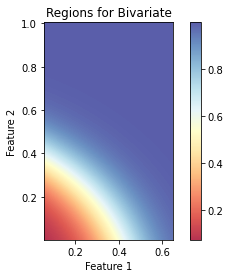

In [138]:
log_prob = gnb.predict_log_proba(Xgrid)
# Compute the difference in log probabilities between the two classes for each point
log_prob_diff = log_prob[:, 1] - log_prob[:, 0]

# Convert the log probability difference to a probability using the logistic function
prob_diff = 1 / (1 + np.exp(-log_prob_diff))

# Reshape the probability difference to the shape of the meshgrid
Z = prob_diff.reshape(xx.shape)

# Plot the decision boundary as a heatmap over the meshgrid of points
plt.imshow(Z, origin='lower', extent=[X_train_bb[:,0].min(), X_train_bb[:,0].max(), X_train_bb[:,1].min(), X_train_bb[:,1].max()], cmap='RdYlBu', alpha=0.8)
plt.colorbar()



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regions for Bivariate')
plt.show()